# Red Wine Quality

In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from pickle import dump

### **Step 1:** Loading the dataset

In [2]:
# Load the dataset from "../data/raw/winequality-red.csv"
winequality_red_df = pd.read_csv("../data/raw/winequality-red.csv")
winequality_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# dataset information
winequality_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Define the desired column names
new_column_names = {
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'chlorides': 'chlorides',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide',
    'density': 'density',
    'pH': 'pH',
    'sulphates': 'sulphates',
    'alcohol': 'alcohol'
}

# Rename the columns in the DataFrame
winequality_red_df.rename(columns=new_column_names, inplace=True)
winequality_red_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


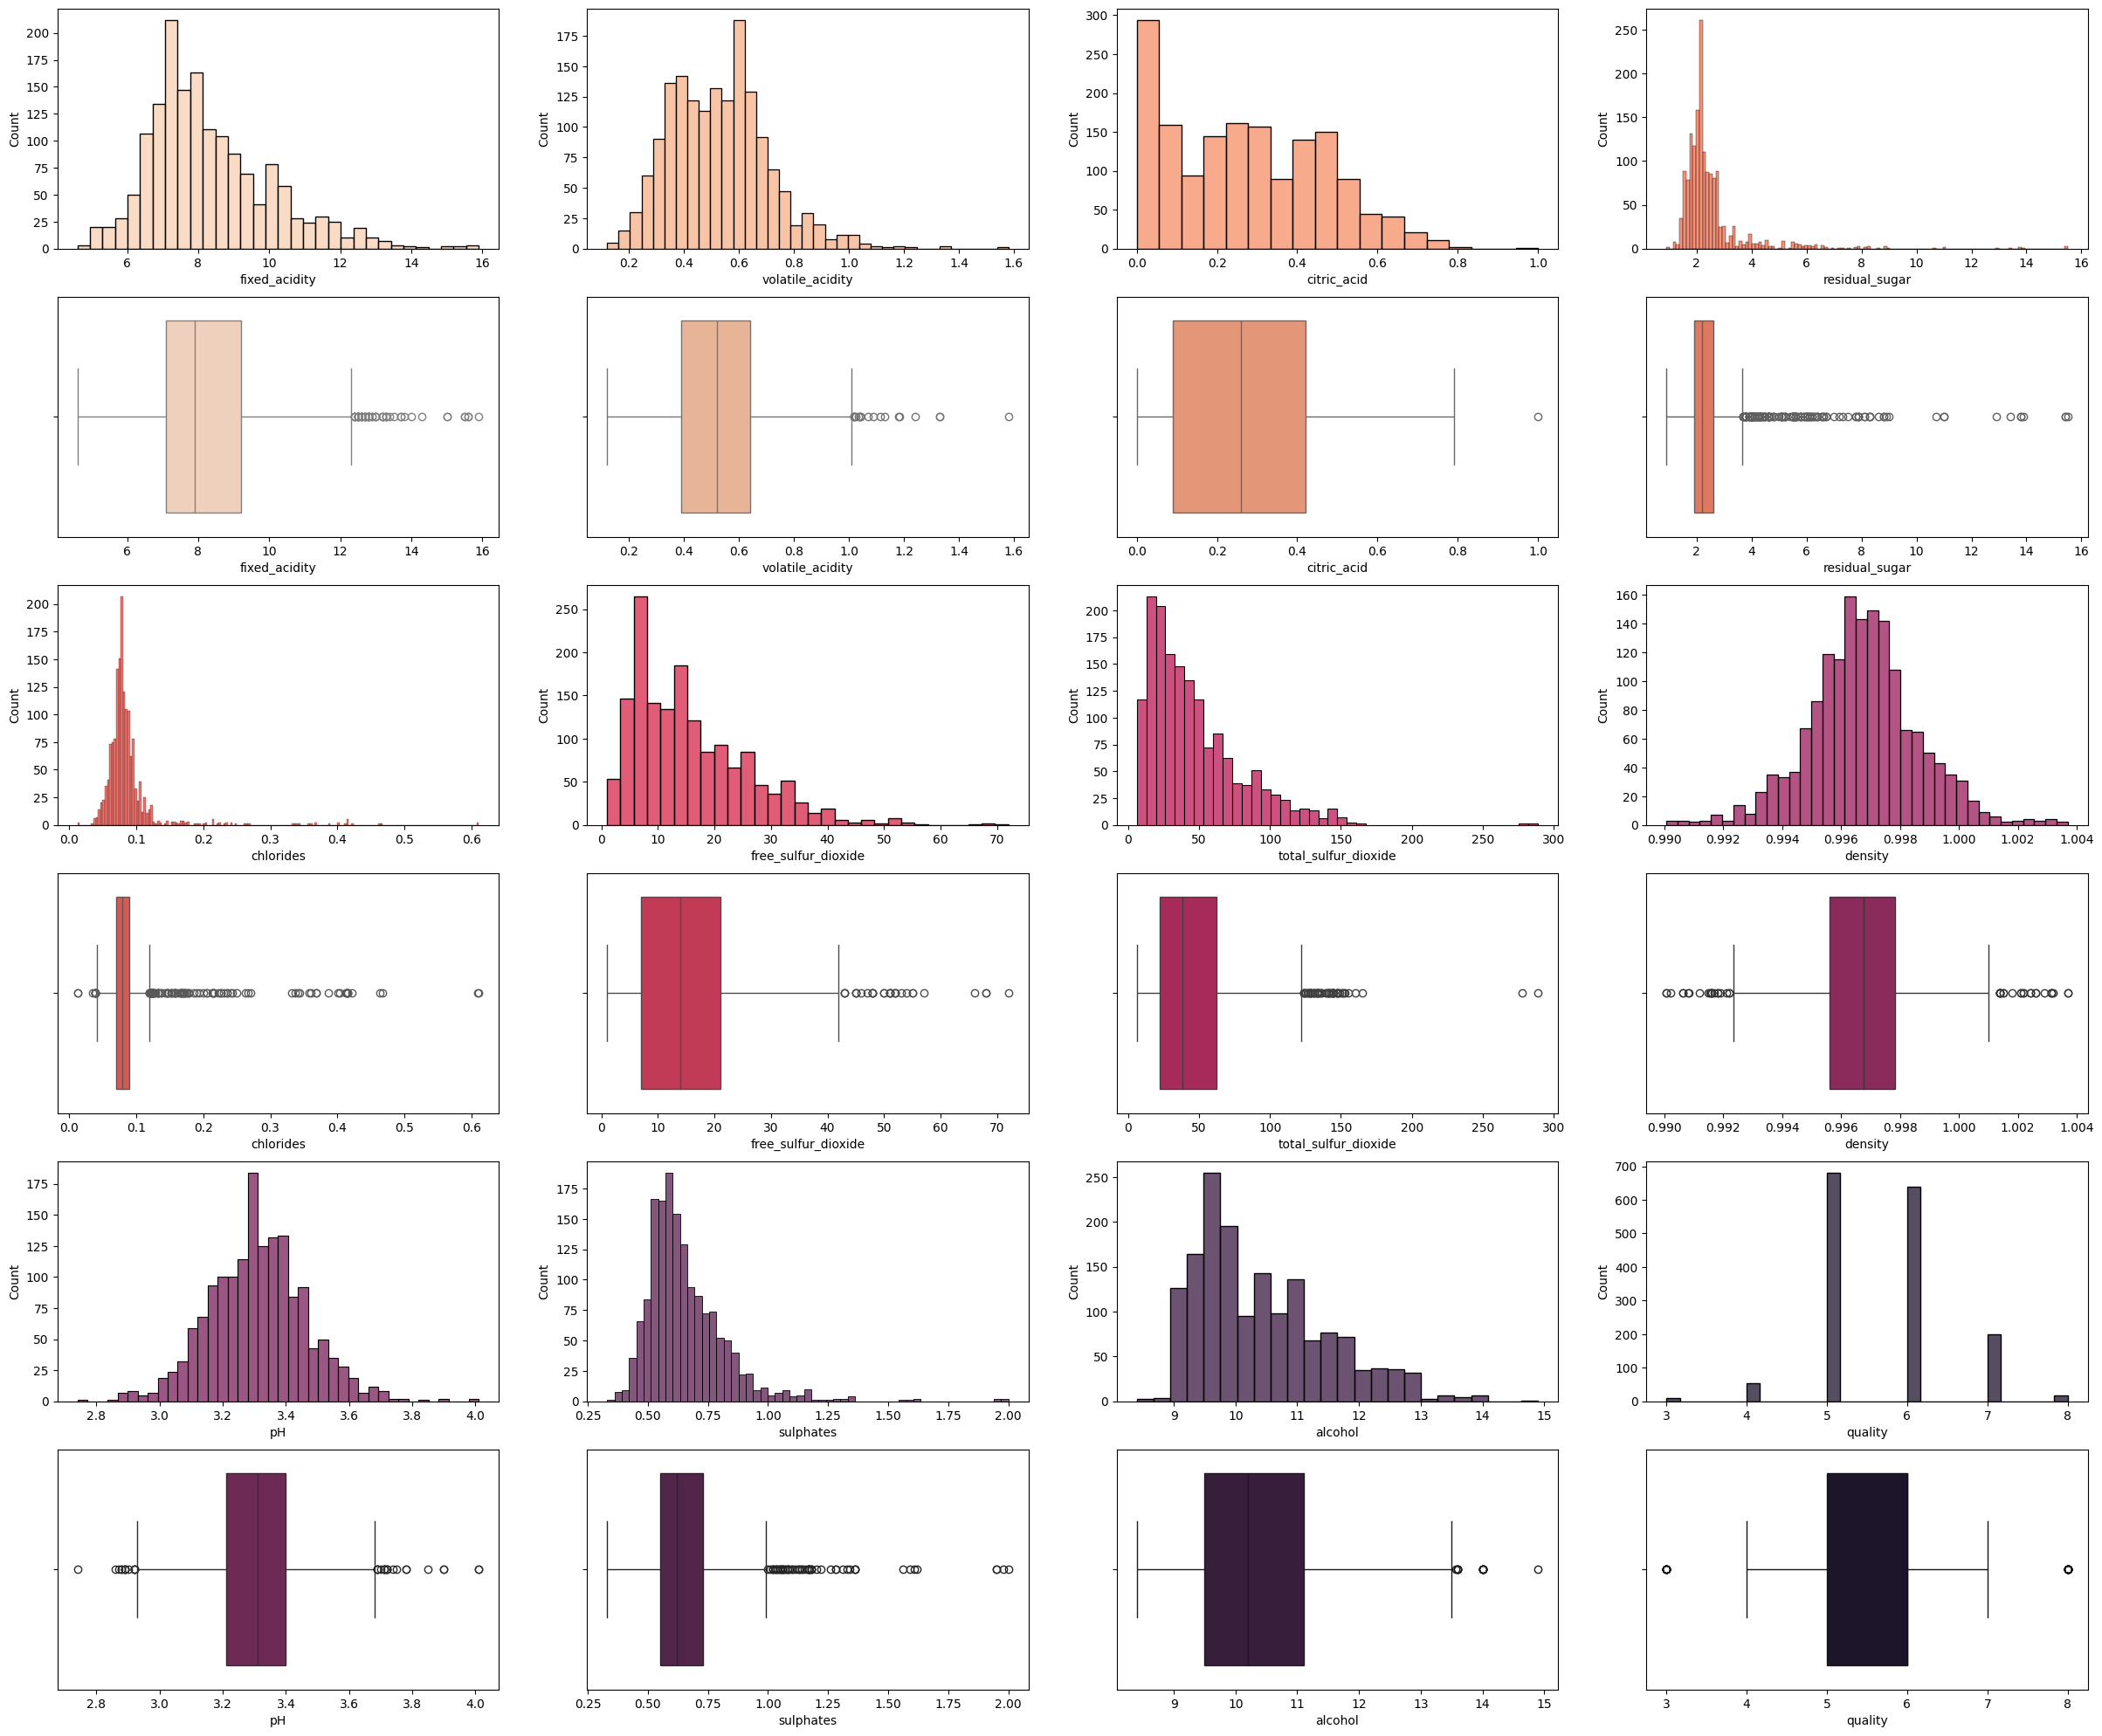

In [5]:
# Create a histogram and boxplot for every variable
fig, ax = plt.subplots(6, 4, figsize = (30, 25))

colors = sns.color_palette("rocket_r", 12)

# Histogram for 'fixed acidity'
sns.histplot(data = winequality_red_df, x = 'fixed_acidity', ax=ax[0,0], color=colors[0])
# Boxplot for 'fixed acidity'
sns.boxplot(data = winequality_red_df, x = 'fixed_acidity', ax=ax[1,0], color=colors[0])
# Histogram for 'volatile acidity'
sns.histplot(data = winequality_red_df, x = 'volatile_acidity', ax=ax[0,1], color=colors[1])
# Boxplot for 'volatile acidity'
sns.boxplot(data = winequality_red_df, x = 'volatile_acidity', ax=ax[1,1], color=colors[1])
# Histogram for 'citric acid'
sns.histplot(data = winequality_red_df, x = 'citric_acid', ax=ax[0,2], color=colors[2])
# Boxplot for 'citric acid'
sns.boxplot(data = winequality_red_df, x = 'citric_acid', ax=ax[1,2], color=colors[2])
# Histogram for 'residual sugar'
sns.histplot(data = winequality_red_df, x = 'residual_sugar', ax=ax[0,3], color=colors[3])
# Boxplot for 'residual sugar'
sns.boxplot(data = winequality_red_df, x = 'residual_sugar', ax=ax[1,3], color=colors[3])
# Histogram for 'chlorides'
sns.histplot(data = winequality_red_df, x = 'chlorides', ax=ax[2,0], color=colors[4])
# Boxplot for 'chlorides'
sns.boxplot(data = winequality_red_df, x = 'chlorides', ax=ax[3,0], color=colors[4])
# Histogram for 'free sulfur dioxide'
sns.histplot(data = winequality_red_df, x = 'free_sulfur_dioxide', ax=ax[2,1], color=colors[5])
# Boxplot for 'free sulfur dioxide'
sns.boxplot(data = winequality_red_df, x = 'free_sulfur_dioxide', ax=ax[3,1], color=colors[5])
# Histogram for 'total sulfur dioxide'
sns.histplot(data = winequality_red_df, x = 'total_sulfur_dioxide', ax=ax[2,2], color=colors[6])
# Boxplot for 'total sulfur dioxide'
sns.boxplot(data = winequality_red_df, x = 'total_sulfur_dioxide', ax=ax[3,2], color=colors[6])
# Histogram for 'density'
sns.histplot(data = winequality_red_df, x = 'density', ax=ax[2,3], color=colors[7])
# Boxplot for 'density'
sns.boxplot(data = winequality_red_df, x = 'density', ax=ax[3,3], color=colors[7])
# Histogram for 'pH'
sns.histplot(data = winequality_red_df, x = 'pH', ax=ax[4,0], color=colors[8])
# Boxplot for 'pH'
sns.boxplot(data = winequality_red_df, x = 'pH', ax=ax[5,0], color=colors[8])
# Histogram for 'sulphates'
sns.histplot(data = winequality_red_df, x = 'sulphates', ax=ax[4,1], color=colors[9])
# Boxplot for 'sulphates'
sns.boxplot(data = winequality_red_df, x = 'sulphates', ax=ax[5,1], color=colors[9])
# Histogram for 'alcohol'
sns.histplot(data = winequality_red_df, x = 'alcohol', ax=ax[4,2], color=colors[10])
# Boxplot for 'alcohol'
sns.boxplot(data = winequality_red_df, x = 'alcohol', ax=ax[5,2], color=colors[10])
# Histogram for 'quality'
sns.histplot(data = winequality_red_df, x = 'quality', ax=ax[4,3], color=colors[11])
# Boxplot for 'quality'
sns.boxplot(data = winequality_red_df, x = 'quality', ax=ax[5,3], color=colors[11])

# show the plot
plt.show()

In [6]:
# Create a new column with the categories "good" and "bad"
winequality_red_df["categories"] = winequality_red_df["quality"].apply(lambda x: "good" if x >= 6 else "bad")
winequality_red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,categories
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [7]:
# Encode the categorical variables to numerical values
winequality_red_df['categories_n'] = pd.factorize(winequality_red_df['categories'])[0]
winequality_red_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,categories,categories_n
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,good,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,good,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,good,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad,0


In [8]:
# Feature selection

# Separate the feature and the target columns
X = winequality_red_df.drop(columns=["quality", "categories", "categories_n"])
y = winequality_red_df["categories_n"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Select the best features
selector = SelectKBest(score_func=f_regression, k=11)
selector.fit(X_train, y_train)

# Create a dataframe with the features
X_train = pd.DataFrame(selector.transform(X_train), columns=X_train.columns[selector.get_support()])
X_test = pd.DataFrame(selector.transform(X_test), columns=X_test.columns[selector.get_support()])

# Show the results
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
1,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
2,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5
3,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
4,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6


In [9]:
X_test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [10]:
# Save the train dataset
train_df = X_train
train_df["y"] = y_train.values
train_df.to_csv("../data/processed/train.csv")
train_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,y
0,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2,0
1,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,0
2,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,1
3,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4,0
4,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,1
1195,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,1
1196,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,0
1197,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,1


In [11]:
# Save the train dataset
test_df = X_test
test_df["y"] = y_test.values
test_df.to_csv("../data/processed/test.csv")
test_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,y
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,1
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,0
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,1
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,0
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,6.7,0.67,0.02,1.90,0.061,26.0,42.0,0.99489,3.39,0.82,10.9,1
396,10.3,0.44,0.50,4.50,0.107,5.0,13.0,0.99800,3.28,0.83,11.5,0
397,7.1,0.60,0.00,1.80,0.074,16.0,34.0,0.99720,3.47,0.70,9.9,1
398,7.8,0.62,0.05,2.30,0.079,6.0,18.0,0.99735,3.29,0.63,9.3,0


### **Step 2:** Create the Decision Tree Model

In [12]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

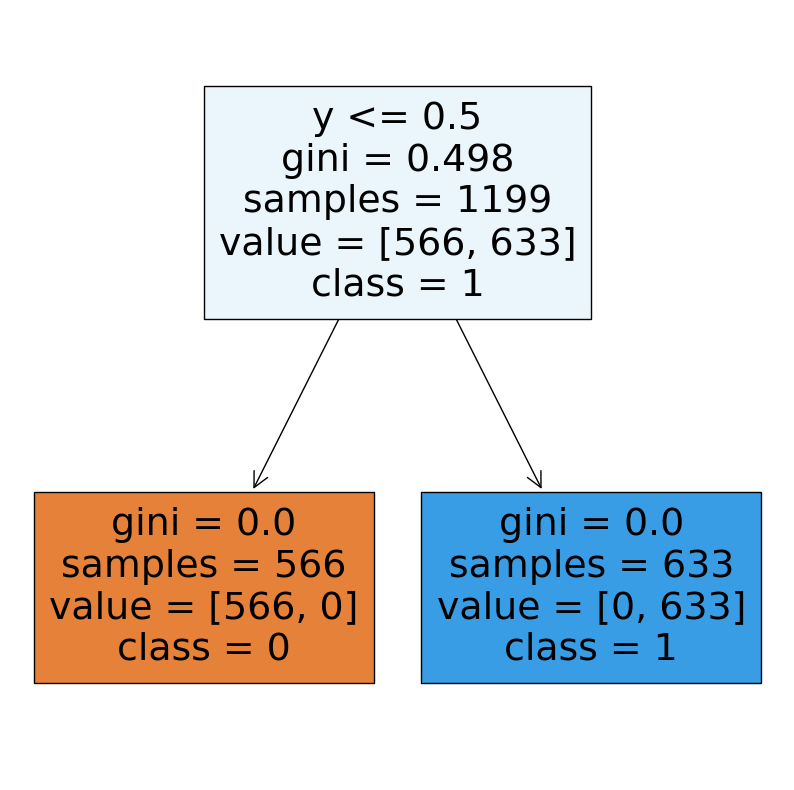

In [13]:
# Vizuallize the tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()

In [14]:
# Predict the test data
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [15]:
# Calculate the accuracy score
accuracy_score(y_test, y_pred)

1.0

In [16]:
# Save the model
dump(model, open('../models/decision_tree_default_42.pkl', 'wb'))